# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{e} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* A few remarks:
  * Unit $mg/(m^3 \cdot day)$
  * Natural logarithm added
  * All the rates on the same time frequency
  * validate the rate of change of the log-scale rate Chl-a by FD
  * Monthly trends 
    * aaa
    * aaa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr
from datetime import datetime
import datetime

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 


plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



# freqency
freq = 7
suf = 'D'
in_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_3.csv'
out_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_4.csv'
folder = './data_collector_modisa_chla9km/'
direc = folder + in_filename
direc

print('in_filename and path:', direc)
print('out_filename:', out_filename)

df_chl_out_3 = pd.read_csv(direc, index_col='index')
df_chl_out_3

in_filename and path: ./data_collector_modisa_chla9km/df_chl_out_7D_modisa_3.csv
out_filename: df_chl_out_7D_modisa_4.csv


,id,time,spd,var_lat,ve,lon,lat,vn,var_lon,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
4663,10206,2002-11-07,5.881464,0.000487,-2.351607,67.145571,11.112429,3.113143,0.001486,1000.000000,NaN,0.130267,-0.885166,-0.004264,NaN,540.9170
4665,11089,2002-11-07,17.183500,0.000067,-16.224571,64.522214,14.321929,-1.954857,0.000133,0.003821,28.931286,0.192224,-0.716192,0.067516,-1.170591,880.9380
4667,15707,2002-11-07,25.486857,0.000077,-9.886893,67.237571,13.279821,-21.813714,0.000155,1000.000000,NaN,0.164760,-0.783149,0.009444,-2.024855,569.8130
4685,34710,2002-11-07,16.909357,0.000073,-4.254286,63.074536,17.550536,15.411857,0.000146,0.001906,28.607679,0.392885,-0.405735,0.016794,-1.774846,542.5690
4691,34721,2002-11-07,16.744036,0.000066,9.964393,68.010643,12.662179,6.091821,0.000130,0.001844,29.422214,0.141941,-0.847893,-0.001058,NaN,467.9290
4922,10206,2002-11-14,3.310714,0.001253,-1.862964,67.061143,11.168893,0.388071,0.004840,1000.000000,NaN,0.145233,-0.837935,0.014966,-1.824894,549.5110
4924,11089,2002-11-14,31.006607,0.000061,-27.037464,63.432571,13.867750,-14.241071,0.000115,0.003591,28.311250,0.234748,-0.629398,0.042524,-1.371369,823.4870
4944,34710,2002-11-14,43.718750,0.000072,-12.182000,62.811500,19.120571,38.809643,0.000143,0.001775,27.771357,0.431795,-0.364722,0.038910,-1.409939,431.9610
4950,34721,2002-11-14,15.720571,0.000054,0.970036,68.344500,13.425500,14.954071,0.000098,0.001712,29.102000,0.156304,-0.806030,0.014363,-1.842747,463.4690


In [3]:
# All the rates on the same time frequency
check1 = df_chl_out_3.chl_rate/ df_chl_out_3.chlor_a 
check1 = check1/ freq
check2 = df_chl_out_3.chl_rate.divide(freq *df_chl_out_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

2.1060423912623583e-15

In [4]:
# add the column to the dataframe and output the dataset
df_chl_out_3['chlor_a_logE_rate'] = pd.Series(np.array(check2), index=df_chl_out_3.index)
df_chl_out_3.head()

,id,time,spd,var_lat,ve,lon,lat,vn,var_lon,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
4663,10206,2002-11-07,5.881464,0.000487,-2.351607,67.145571,11.112429,3.113143,0.001486,1000.000000,NaN,0.130267,-0.885166,-0.004264,NaN,540.917,-0.004676
4665,11089,2002-11-07,17.183500,0.000067,-16.224571,64.522214,14.321929,-1.954857,0.000133,0.003821,28.931286,0.192224,-0.716192,0.067516,-1.170591,880.938,0.050177
4667,15707,2002-11-07,25.486857,0.000077,-9.886893,67.237571,13.279821,-21.813714,0.000155,1000.000000,NaN,0.164760,-0.783149,0.009444,-2.024855,569.813,0.008188
4685,34710,2002-11-07,16.909357,0.000073,-4.254286,63.074536,17.550536,15.411857,0.000146,0.001906,28.607679,0.392885,-0.405735,0.016794,-1.774846,542.569,0.006106
4691,34721,2002-11-07,16.744036,0.000066,9.964393,68.010643,12.662179,6.091821,0.000130,0.001844,29.422214,0.141941,-0.847893,-0.001058,NaN,467.929,-0.001065


In [5]:
df_chl_out_3.chlor_a_logE_rate.describe()  # more scattered on the left hand side

count    723.000000
mean      -0.051942
std        0.313747
min       -4.993384
25%       -0.033324
50%       -0.002568
75%        0.025332
max        0.138126
Name: chlor_a_logE_rate, dtype: float64

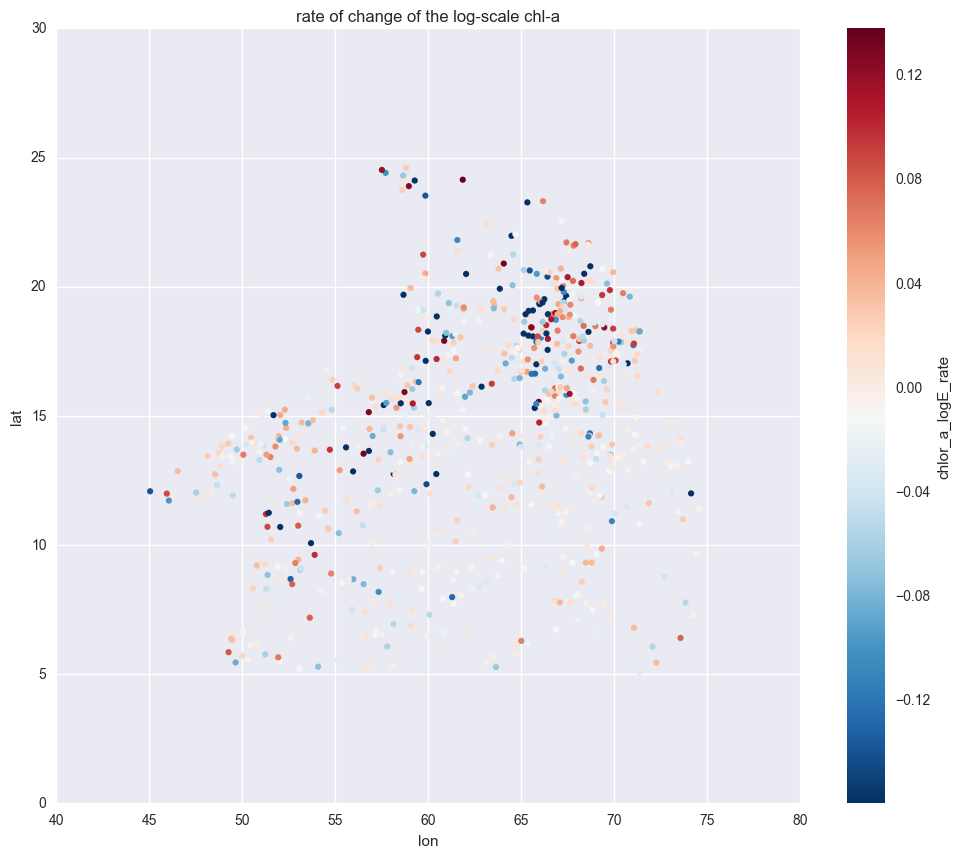

In [6]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_logE_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

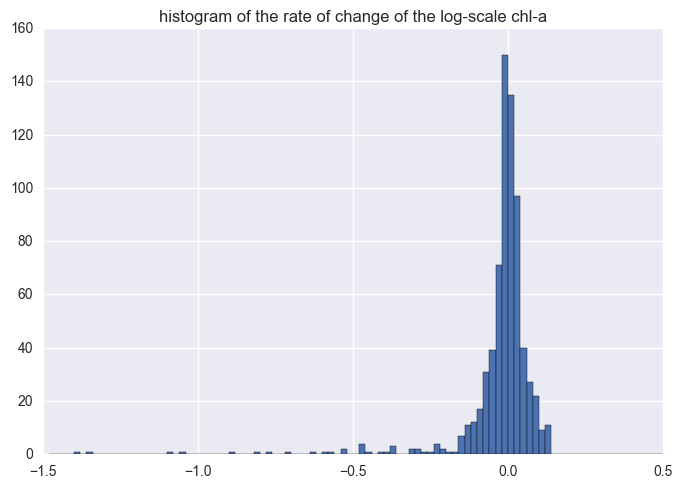

In [7]:
# histogram for non standarized data
axdf_chl = df_chl_out_3.chlor_a_logE_rate.dropna().hist(bins=100,range=[-1.5,0.5]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

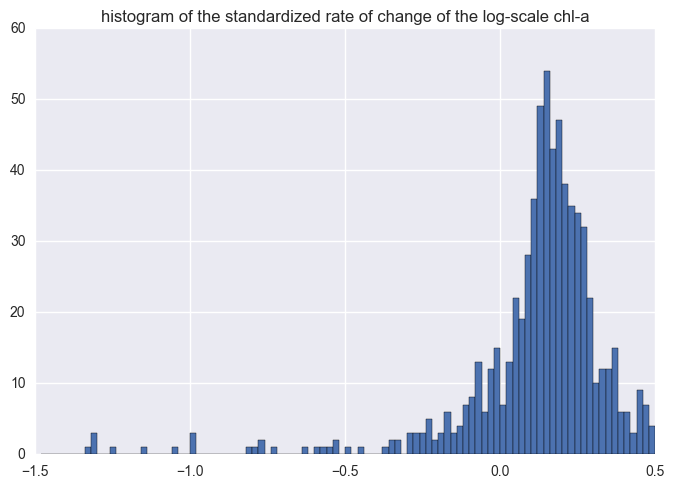

In [8]:
# standarized series
tmp = df_chl_out_3.chlor_a_logE_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-1.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [20]:
(np.log(0.131890)-np.log(0.145233))   / freq

-0.013767301065377284

In [10]:
###########################
# On 2D-subsampling Dataset
###########################
# Val 1:
# id:10206, time:2002-11-21"
# (0.131890 - 0.145233) / (freq*0.131890)    == -0.014452519957107106
#########
# Val 2:
# id:10206, time:2002-11-21"
# (np.log(0.131890)-np.log(0.145233))   / freq == -0.013767301065377284 # very close to the value above

df_chl_out_3.sort_values(by=['id', 'time']).head()

,id,time,spd,var_lat,ve,lon,lat,vn,var_lon,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
4663,10206,2002-11-07,5.881464,0.000487,-2.351607,67.145571,11.112429,3.113143,0.001486,1000.0,NaN,0.130267,-0.885166,-0.004264,NaN,540.917,-0.004676
4922,10206,2002-11-14,3.310714,0.001253,-1.862964,67.061143,11.168893,0.388071,0.004840,1000.0,NaN,0.145233,-0.837935,0.014966,-1.824894,549.511,0.014721
5181,10206,2002-11-21,4.650393,0.000887,-1.006821,66.993786,11.222714,2.276107,0.003094,1000.0,NaN,0.131890,-0.879788,-0.013343,NaN,558.228,-0.014453
5440,10206,2002-11-28,9.982857,0.000584,-9.219786,66.747107,11.368571,3.435071,0.001896,1000.0,NaN,0.139830,-0.854400,0.007940,-2.100180,584.681,0.008112
6217,10206,2002-12-19,9.386000,0.001232,-8.125214,64.930429,12.417786,4.508357,0.004582,1000.0,NaN,0.155590,-0.808018,0.024163,-1.616840,791.318,0.022186


In [11]:
# convert into datetime
df_chl_out_3['time'] = pd.to_datetime(df_chl_out_3['time']) # ,format='%m/%d/%y %I:%M%p'
df_chl_out_3.sort_values(by=['id', 'time']).head()  # a check

,id,time,spd,var_lat,ve,lon,lat,vn,var_lon,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
4663,10206,2002-11-07,5.881464,0.000487,-2.351607,67.145571,11.112429,3.113143,0.001486,1000.0,NaN,0.130267,-0.885166,-0.004264,NaN,540.917,-0.004676
4922,10206,2002-11-14,3.310714,0.001253,-1.862964,67.061143,11.168893,0.388071,0.004840,1000.0,NaN,0.145233,-0.837935,0.014966,-1.824894,549.511,0.014721
5181,10206,2002-11-21,4.650393,0.000887,-1.006821,66.993786,11.222714,2.276107,0.003094,1000.0,NaN,0.131890,-0.879788,-0.013343,NaN,558.228,-0.014453
5440,10206,2002-11-28,9.982857,0.000584,-9.219786,66.747107,11.368571,3.435071,0.001896,1000.0,NaN,0.139830,-0.854400,0.007940,-2.100180,584.681,0.008112
6217,10206,2002-12-19,9.386000,0.001232,-8.125214,64.930429,12.417786,4.508357,0.004582,1000.0,NaN,0.155590,-0.808018,0.024163,-1.616840,791.318,0.022186


In [12]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
print('out_filename:', out_filename)
df_chl_out_3.to_csv(out_filename, sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv(out_filename, index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

out_filename: df_chl_out_7D_modisa_4.csv


,id,time,spd,var_lat,ve,lon,lat,vn,var_lon,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
4663,10206,2002-11-07,5.881464,0.000487,-2.351607,67.145571,11.112429,3.113143,0.001486,1000.0,NaN,0.130267,-0.885166,-0.004264,NaN,540.917,-0.004676
4922,10206,2002-11-14,3.310714,0.001253,-1.862964,67.061143,11.168893,0.388071,0.004840,1000.0,NaN,0.145233,-0.837935,0.014966,-1.824894,549.511,0.014721
5181,10206,2002-11-21,4.650393,0.000887,-1.006821,66.993786,11.222714,2.276107,0.003094,1000.0,NaN,0.131890,-0.879788,-0.013343,NaN,558.228,-0.014453
5440,10206,2002-11-28,9.982857,0.000584,-9.219786,66.747107,11.368571,3.435071,0.001896,1000.0,NaN,0.139830,-0.854400,0.007940,-2.100180,584.681,0.008112
6217,10206,2002-12-19,9.386000,0.001232,-8.125214,64.930429,12.417786,4.508357,0.004582,1000.0,NaN,0.155590,-0.808018,0.024163,-1.616840,791.318,0.022186


In [13]:
## check the week numbers of the range from Nov-01-01 to Mar-01-01
for year in range(2002, 2017):
    print(str(year)+'-11-01 is week', datetime.datetime(year, 11, 1).isocalendar()[1])  # 44, 45, 

print('----')
for year in range(2002, 2017):
    print(str(year)+'-3-31 is week', datetime.datetime(year, 3, 31).isocalendar()[1])  # 13, 14

plt.show()

2002-11-01 is week 44
2003-11-01 is week 44
2004-11-01 is week 45
2005-11-01 is week 44
2006-11-01 is week 44
2007-11-01 is week 44
2008-11-01 is week 44
2009-11-01 is week 44
2010-11-01 is week 44
2011-11-01 is week 44
2012-11-01 is week 44
2013-11-01 is week 44
2014-11-01 is week 44
2015-11-01 is week 44
2016-11-01 is week 44
----
2002-3-31 is week 13
2003-3-31 is week 14
2004-3-31 is week 14
2005-3-31 is week 13
2006-3-31 is week 13
2007-3-31 is week 13
2008-3-31 is week 14
2009-3-31 is week 14
2010-3-31 is week 13
2011-3-31 is week 13
2012-3-31 is week 13
2013-3-31 is week 13
2014-3-31 is week 14
2015-3-31 is week 14
2016-3-31 is week 13


the min and max of the week index is 1, 53 :


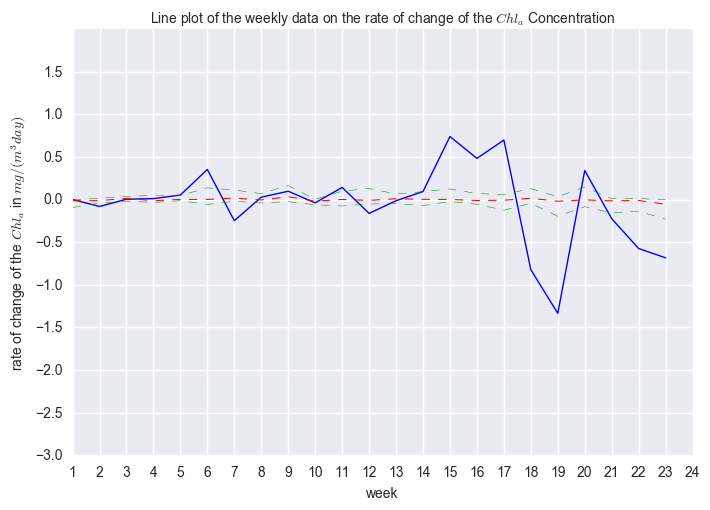

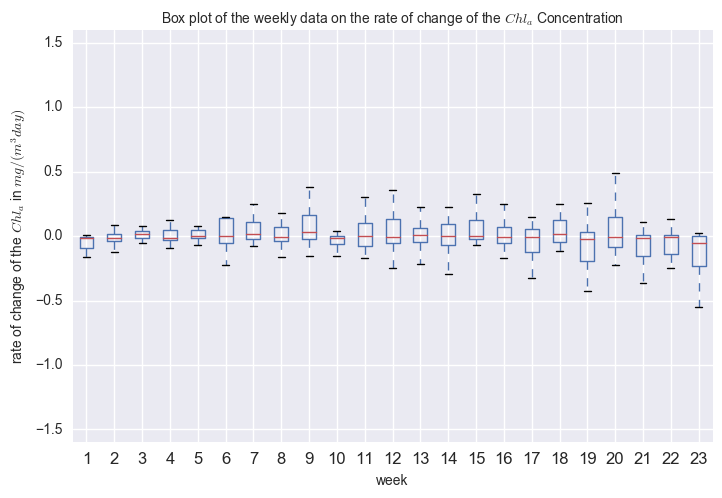

In [14]:
##### weekly plot on the Lagrangian rate of change of the chl-a
#sns.set(style="white")
#sns.set(color_codes=True)

### 
# Approach 1 depreciated
#grouped = df_timed.chl_rate.groupby(df_timed.index.week)
#grouped.plot.box()

### 
# Approach 2
# prepare data  a. use index or columns to group

###
# select the corresponding weeks, prepare the data
df_timed = df_chl_out_3.set_index('time')
df_timed['week'] = df_timed.index.week

mask_NovMar = (df_timed.week<=14) | (df_timed.week >=44)
df_timed_NovMar = df_timed[mask_NovMar]
#df_timed_NovMar.head()

# now rotate the index to make Nov-01-01 the first month
print('the min and max of the week index is %d, %d :' % (df_timed_NovMar.week.min(), df_timed_NovMar.week.max()) )
# make the 44th week the 1st week
df_timed_NovMar['week_rotate'] = (df_timed_NovMar.week + 10 ) % 53
df_timed_NovMar.week_rotate.describe() # now from 1 to 24


axes1=df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-3,2)
axes1.set_title("Line plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-3, 2, 0.5))
plt.xticks(np.arange(1, 25, 1))
plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chl_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1.6,1.6)
axes2.set_title("Box plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.show()

# the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")

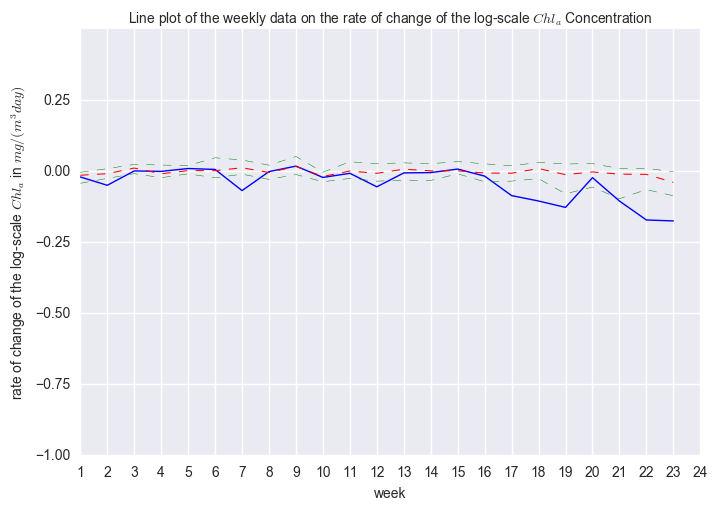

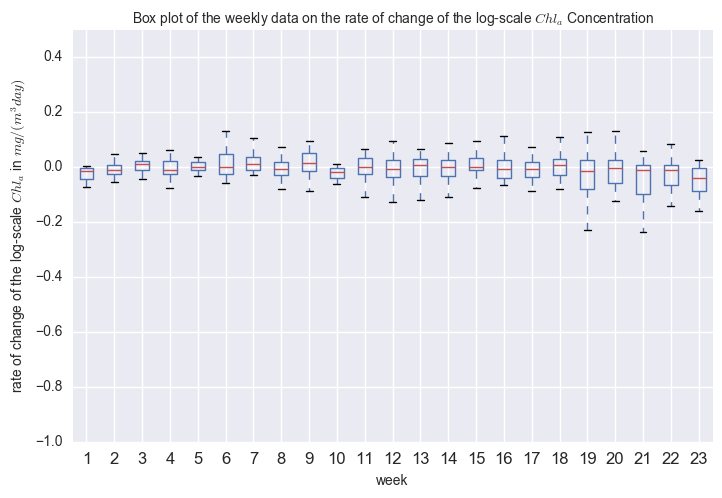

In [15]:
# weekly plot on the Lagrangian rate of change of the log-scale chl-a
# This is the rate of change on the exponential scale
axes1=df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-1,0.5)
axes1.set_title("Line plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-1, 0.5, 0.25))
plt.xticks(np.arange(1, 25, 1))
#plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chlor_a_logE_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1,0.5)
axes2.set_title("Box plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
#plt.show()


#plt.close('all')

In [16]:
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



 summary of the Chl_rate 
 count    106.000000
mean      -0.009087
std        0.187237
min       -1.371494
25%       -0.029798
50%       -0.002513
75%        0.037431
max        0.745820
Name: chl_rate, dtype: float64


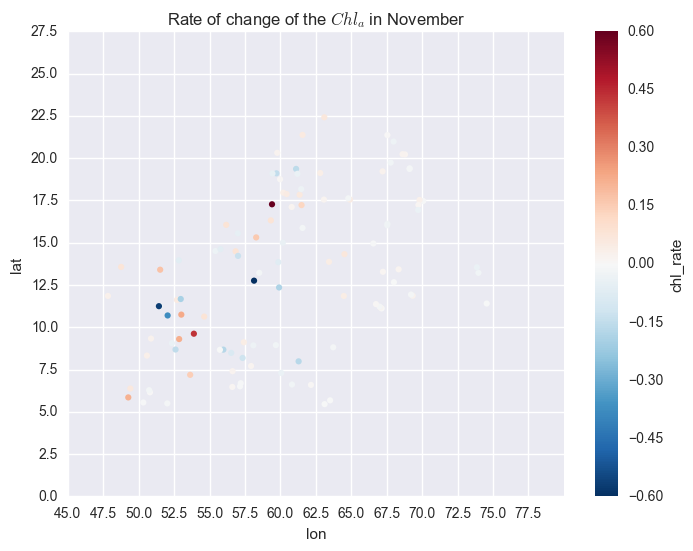



 summary of the Chl_rate 
 count    114.000000
mean       0.047336
std        0.998323
min       -7.346187
25%       -0.037127
50%        0.012848
75%        0.092641
max        7.363754
Name: chl_rate, dtype: float64


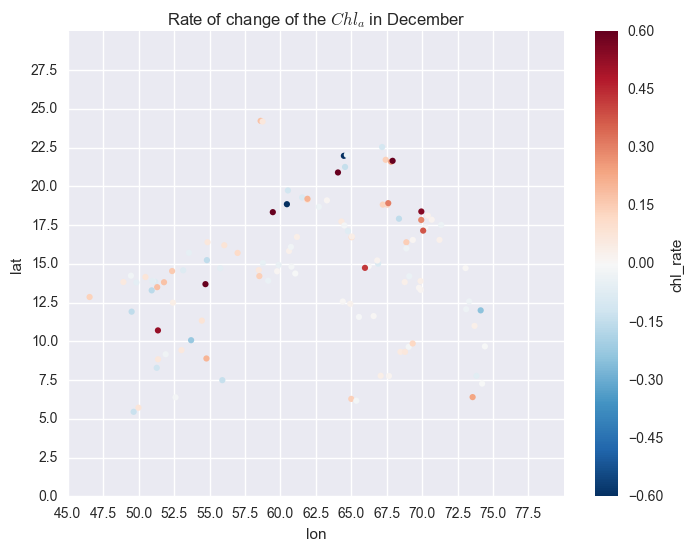



 summary of the Chl_rate 
 count    159.000000
mean       0.191225
std        1.476104
min       -4.918748
25%       -0.051795
50%        0.001460
75%        0.096752
max       14.397376
Name: chl_rate, dtype: float64


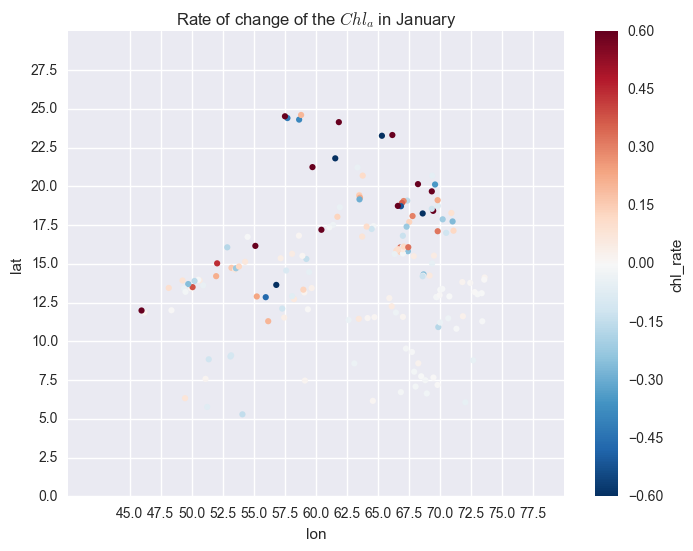



 summary of the Chl_rate 
 count    167.000000
mean      -0.334437
std        7.440621
min      -51.763635
25%       -0.075132
50%       -0.000485
75%        0.093482
max       49.713420
Name: chl_rate, dtype: float64


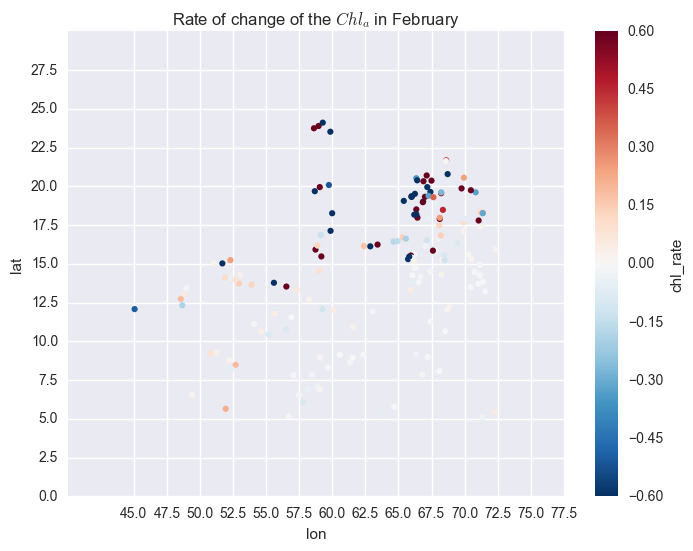



 summary of the Chl_rate 
 count    177.000000
mean      -0.213897
std        2.524451
min      -20.049905
25%       -0.129243
50%       -0.013572
75%        0.010955
max       10.810810
Name: chl_rate, dtype: float64


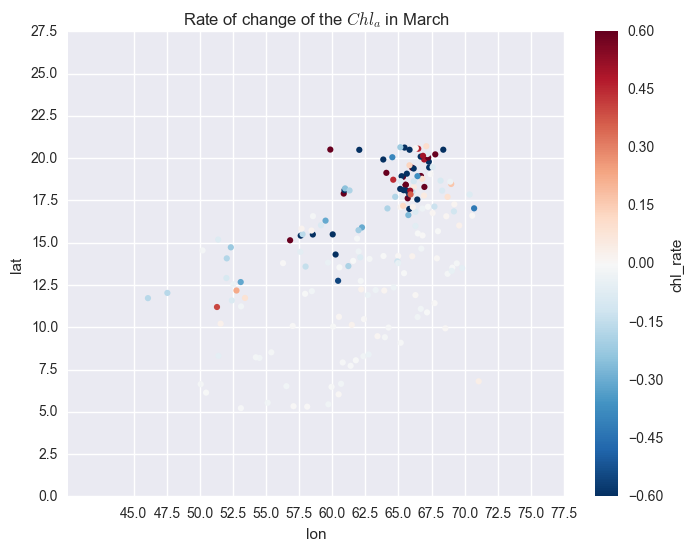

In [17]:
# spatial plot for different months --  totally five months 1, 2, 3, 11, 12, 
for i in range(0,5,1):
    month_ind = np.array([11,12,1,2,3])
    month_names = ['November', 'December','January','February', 'March']
    aa = df_timed_NovMar[df_timed_NovMar.index.month == month_ind[i]]
    fig, ax  = plt.subplots(figsize=(8,6))
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.median()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.median()-0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.mean()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.mean()+0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    print('\n\n summary of the Chl_rate \n', aa.chl_rate.describe())
    aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=-0.6, vmax=0.6, edgecolor='none', ax=ax, title = 'Rate of change of the $Chl_a$ in %s' % (month_names[i]))
    plt.xticks(np.arange(45, 80, 2.5))
    plt.yticks(np.arange(0, 28, 2.5))
    plt.show()

In [18]:
print("test")

test
